Please upload the Excel files: MSFT.xlsx, CRM.xlsx, V.xlsx, ORACLE.xlsx


Saving ORACLE.xlsx to ORACLE.xlsx
Saving V.xlsx to V.xlsx
Saving MSFT.xlsx to MSFT.xlsx
Saving CRM.xlsx to CRM.xlsx
Loaded MSFT: 191 observations from 2024-01-10 00:00:00 to 2025-12-05 00:00:00
Loaded CRM: 191 observations from 2024-01-10 00:00:00 to 2025-12-05 00:00:00
Loaded V: 191 observations from 2024-01-10 00:00:00 to 2025-12-05 00:00:00
Loaded ORACLE: 191 observations from 2024-01-10 00:00:00 to 2025-12-05 00:00:00

Combined DataFrame shape: (191, 4)


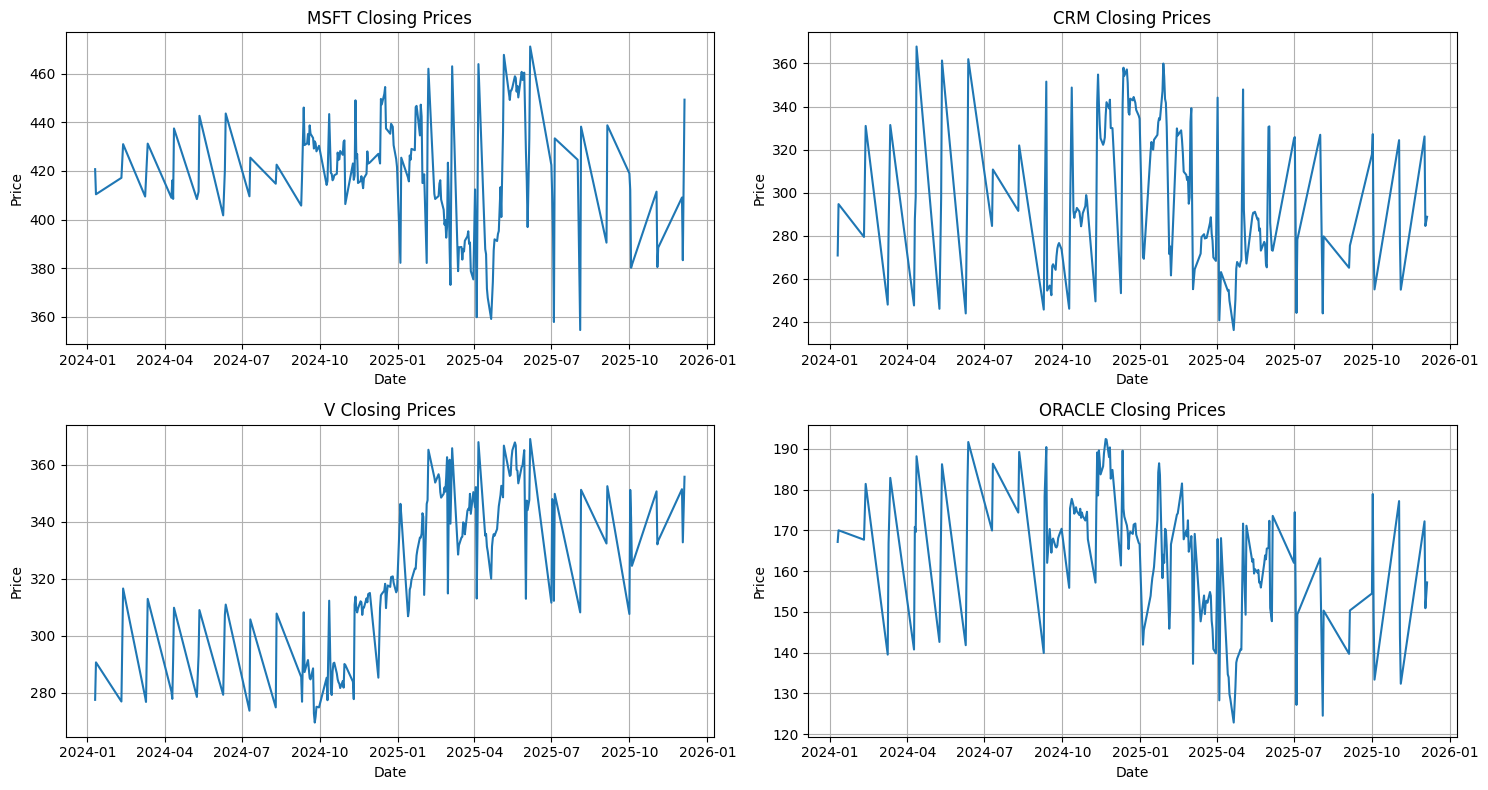


AUGMENTED DICKEY-FULLER TEST RESULTS

MSFT ADF Test:
ADF Statistic: -3.387711
p-value: 0.011385
Critical Values:
   1%: -3.466
   5%: -2.877
   10%: -2.575
Result: Series is stationary

CRM ADF Test:
ADF Statistic: -1.431913
p-value: 0.566885
Critical Values:
   1%: -3.468
   5%: -2.878
   10%: -2.576
Result: Series has a unit root (non-stationary)

V ADF Test:
ADF Statistic: -1.274702
p-value: 0.640665
Critical Values:
   1%: -3.466
   5%: -2.877
   10%: -2.575
Result: Series has a unit root (non-stationary)

ORACLE ADF Test:
ADF Statistic: -2.852745
p-value: 0.051125
Critical Values:
   1%: -3.466
   5%: -2.877
   10%: -2.575
Result: Series has a unit root (non-stationary)

FIRST DIFFERENCING

MSFT - ADF Test on First Difference:
ADF Statistic: -10.069371
p-value: 0.000000
Result: Differenced series is stationary

CRM - ADF Test on First Difference:
ADF Statistic: -6.611505
p-value: 0.000000
Result: Differenced series is stationary

V - ADF Test on First Difference:
ADF Statistic: -

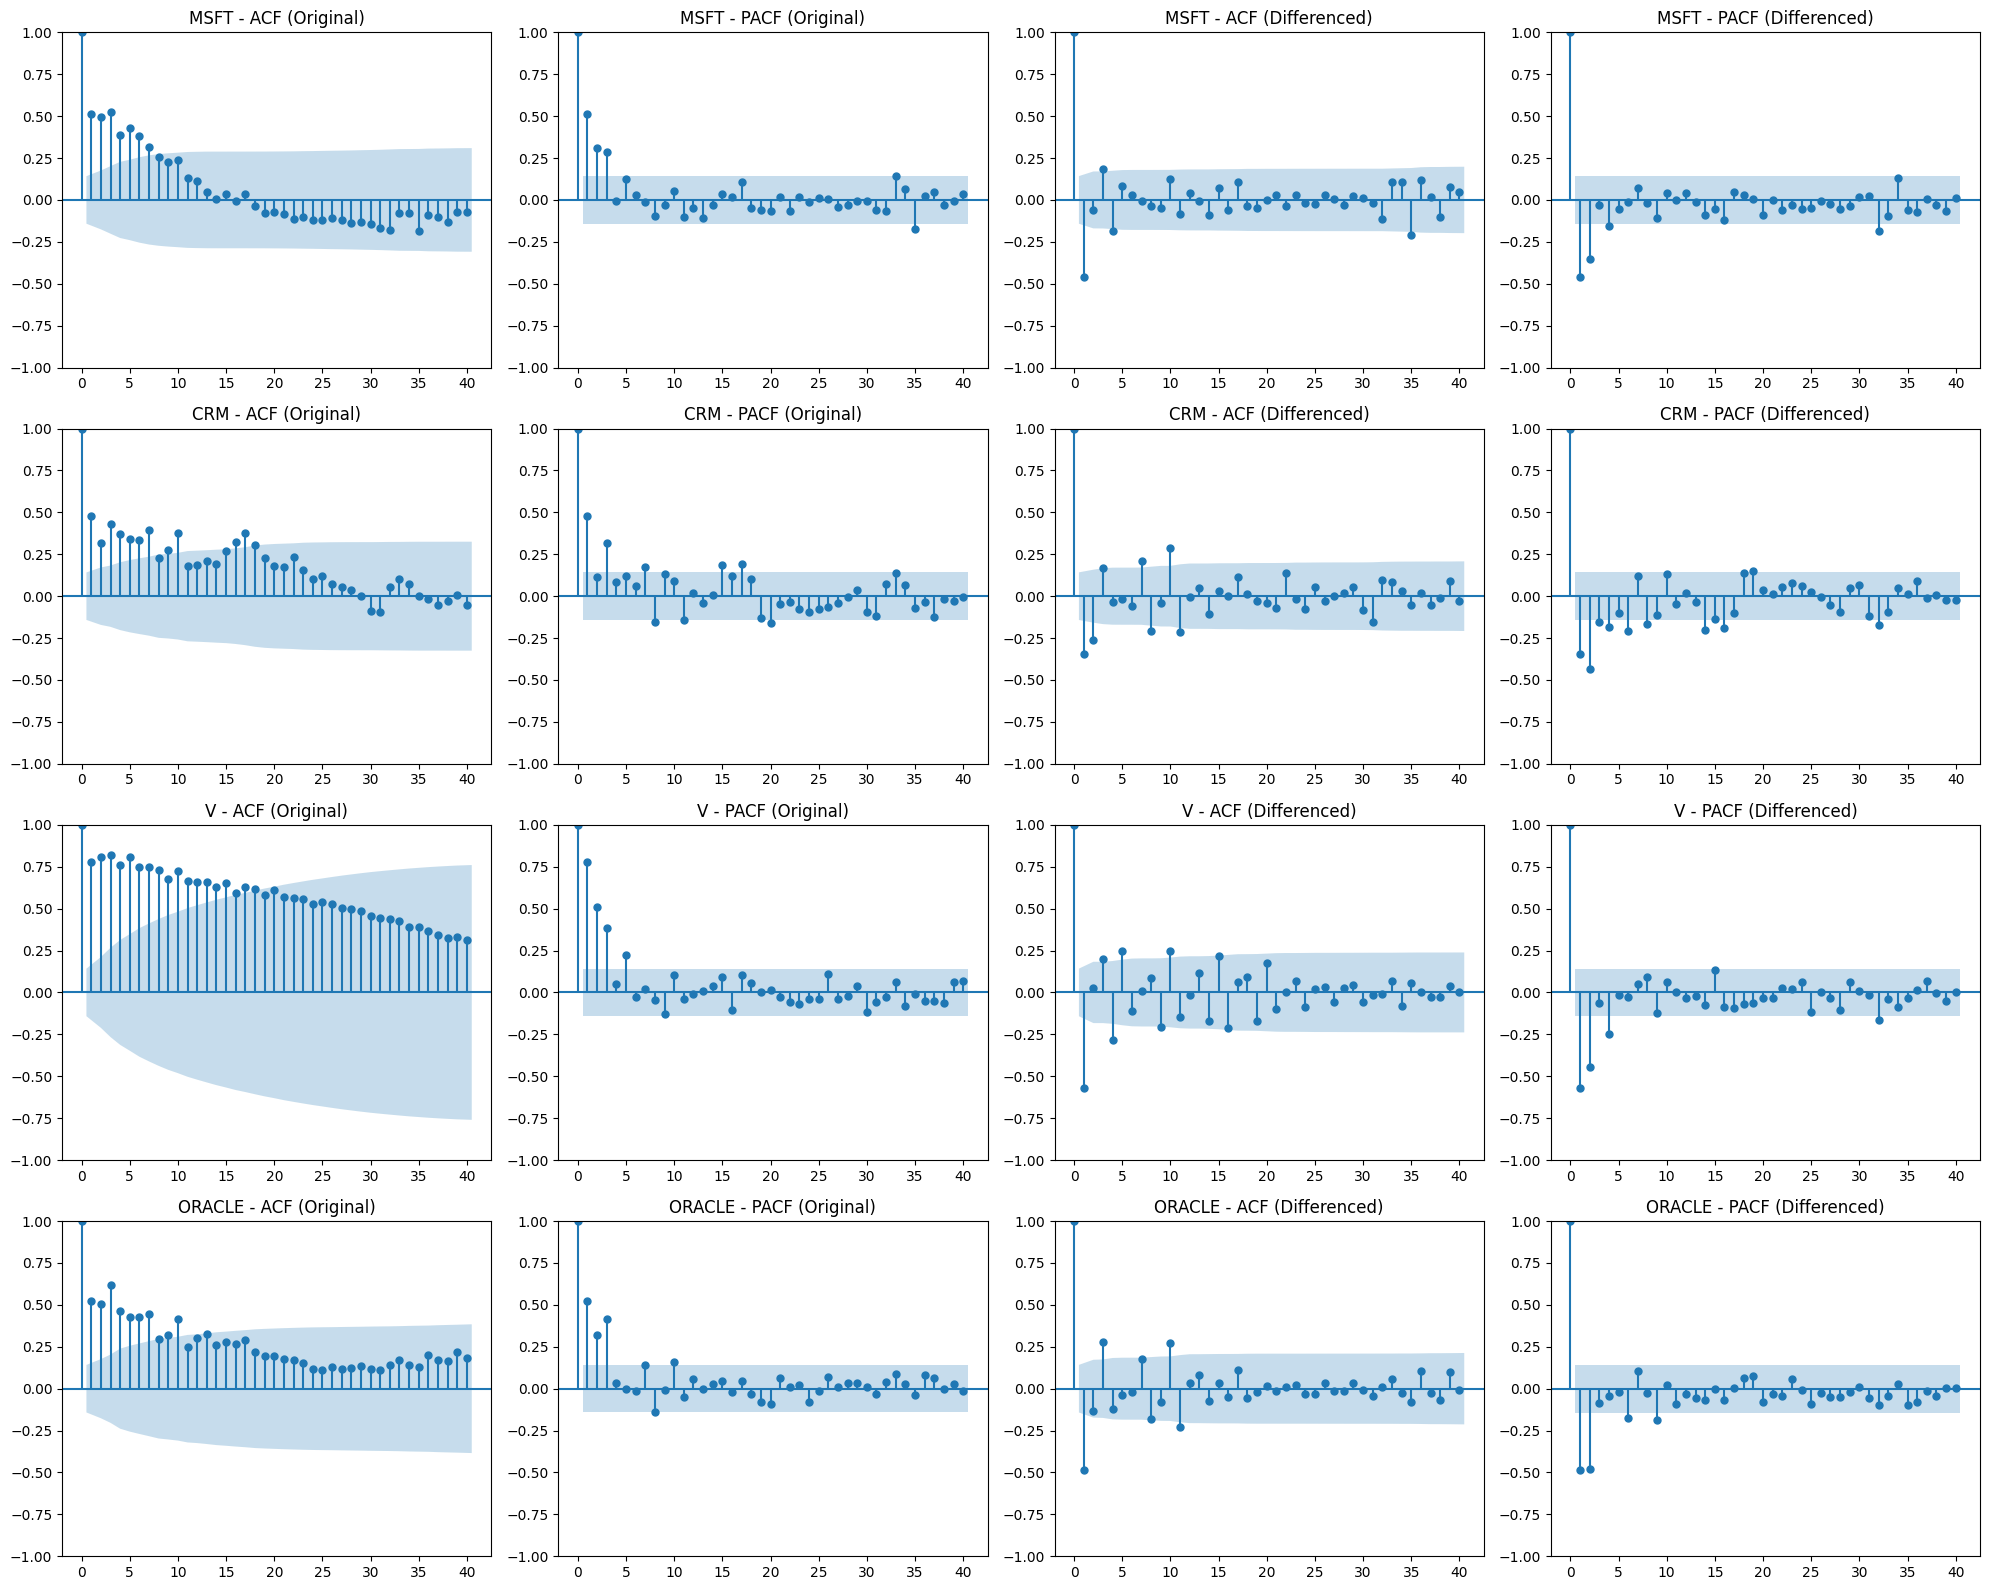


ARMA MODEL FITTING

MSFT ARIMA Model:
Fitting ARIMA(1,0,1) - equivalent to ARMA(1,1)
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        418.0427      7.170     58.301      0.000     403.989     432.096
ar.L1          0.9194      0.041     22.586      0.000       0.840       0.999
ma.L1         -0.6228      0.063     -9.881      0.000      -0.746      -0.499
sigma2       368.1549     30.068     12.244      0.000     309.223     427.087

CRM ARIMA Model:
Fitting ARIMA(1,1,1) due to non-stationarity
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1628      0.091      1.794      0.073      -0.015       0.341
ma.L1         -0.8526      0.081    -10.528      0.000      -1.011      -0.694
sigma2       767.7495     74.269     10.337      0.000     62

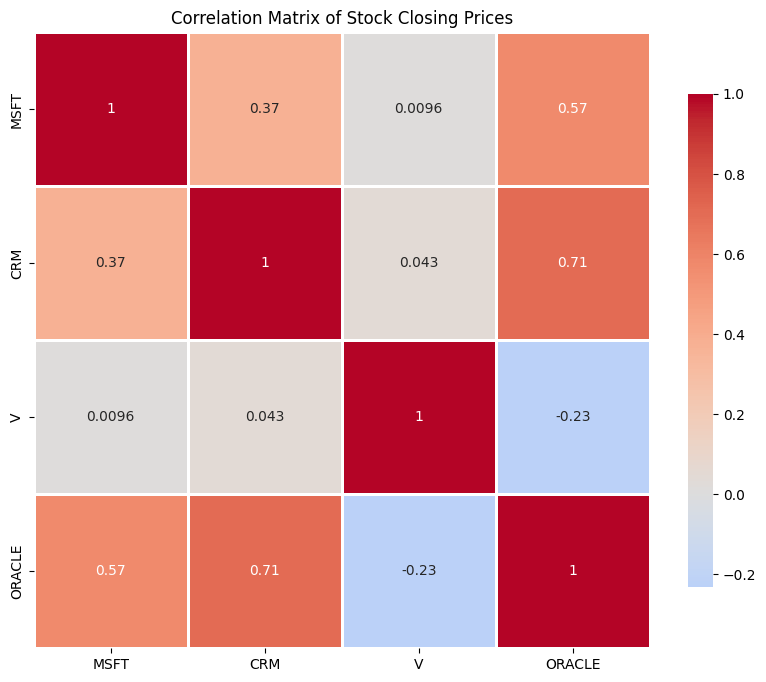


SUMMARY STATISTICS
             MSFT         CRM           V      ORACLE
count  191.000000  191.000000  191.000000  191.000000
mean   418.267435  297.542199  321.870681  163.752408
std     24.377779   33.250496   27.802237   15.979608
min    354.560000  236.260000  269.630000  122.820000
25%    404.860000  272.185000  307.155000  153.925000
50%    418.780000  290.460000  319.620000  166.860000
75%    434.035000  328.080000  346.340000  173.975000
max    471.110000  367.870000  369.090000  192.430000

MODEL DIAGNOSTICS - RESIDUAL ANALYSIS


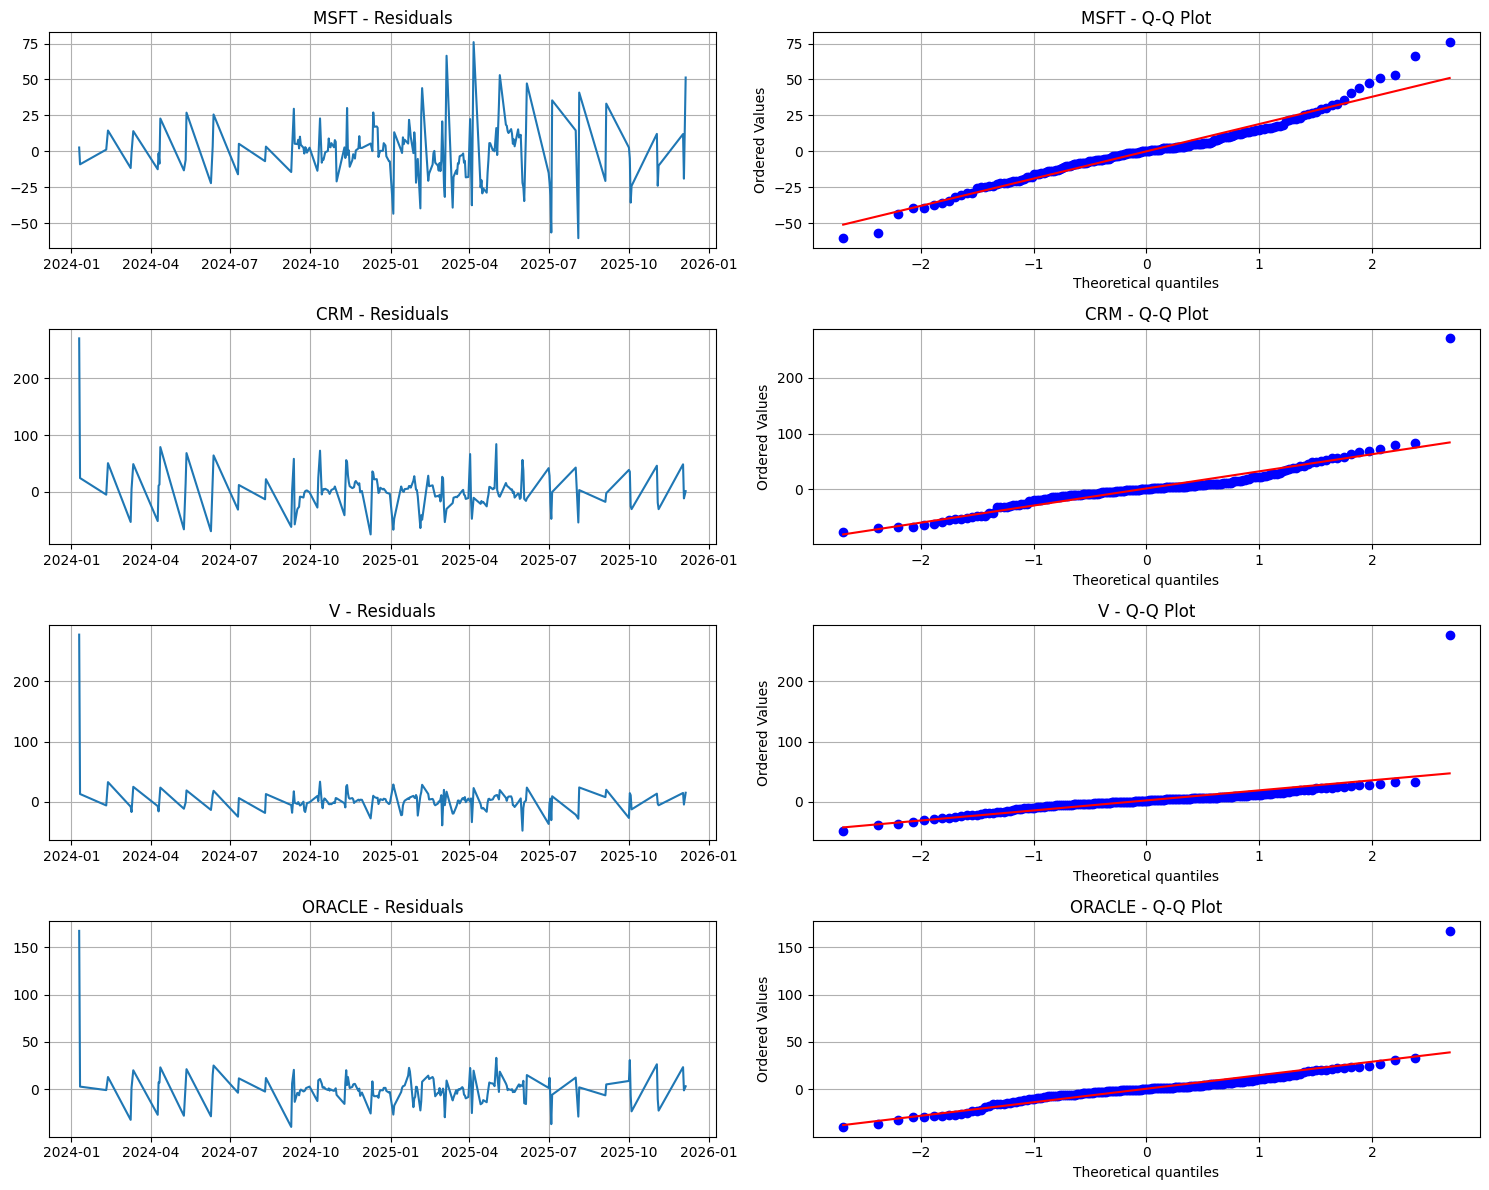


Analysis complete!
Key findings:
1. Unit root tests show whether each series is stationary
2. Correlograms help identify ARMA order
3. Cointegration tests show long-run relationships between stocks
4. Random walk tests indicate market efficiency for each stock


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import coint
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Step 1: Upload files
print("Please upload the Excel files: MSFT.xlsx, CRM.xlsx, V.xlsx, ORACLE.xlsx")
uploaded = files.upload()

# Step 2: Load the data
# Load each file and handle the different column names
data_dict = {}
stock_names = ['MSFT', 'CRM', 'V', 'ORACLE']

for stock in stock_names:
    df = pd.read_excel(f'{stock}.xlsx')

    # Handle different column names (CRM has 'Price' instead of 'Close')
    if 'Close' in df.columns:
        close_col = 'Close'
    elif 'Price' in df.columns:
        close_col = 'Price'
    else:
        print(f"Warning: No 'Close' or 'Price' column found in {stock}")
        continue

    # Select Date and closing price columns
    df = df[['Date', close_col]].copy()
    df.rename(columns={close_col: 'Close'}, inplace=True)

    # Convert Date to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    data_dict[stock] = df['Close']
    print(f"Loaded {stock}: {len(df)} observations from {df.index[0]} to {df.index[-1]}")

# Combine all series into one DataFrame
combined_df = pd.DataFrame(data_dict)
print(f"\nCombined DataFrame shape: {combined_df.shape}")

# Step 3: Plot the time series
plt.figure(figsize=(15, 8))
for i, stock in enumerate(stock_names):
    plt.subplot(2, 2, i+1)
    plt.plot(combined_df[stock])
    plt.title(f'{stock} Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: ADF (Augmented Dickey-Fuller) Test for Unit Root
print("\n" + "="*60)
print("AUGMENTED DICKEY-FULLER TEST RESULTS")
print("="*60)

adf_results = {}
for stock in stock_names:
    print(f"\n{stock} ADF Test:")
    result = adfuller(combined_df[stock].dropna())
    adf_results[stock] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

    print(f"ADF Statistic: {result[0]:.6f}")
    print(f"p-value: {result[1]:.6f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.3f}")

    if result[1] > 0.05:
        print(f"Result: Series has a unit root (non-stationary)")
    else:
        print(f"Result: Series is stationary")

# Step 5: First Differencing if needed
print("\n" + "="*60)
print("FIRST DIFFERENCING")
print("="*60)

diff_data = {}
for stock in stock_names:
    # Calculate first difference
    diff_data[stock] = combined_df[stock].diff().dropna()

    # Test stationarity of differenced series
    print(f"\n{stock} - ADF Test on First Difference:")
    result = adfuller(diff_data[stock])
    print(f"ADF Statistic: {result[0]:.6f}")
    print(f"p-value: {result[1]:.6f}")

    if result[1] > 0.05:
        print(f"Result: Differenced series still has unit root")
    else:
        print(f"Result: Differenced series is stationary")

# Step 6: Correlograms (ACF and PACF)
print("\n" + "="*60)
print("CORRELOGRAMS - ACF AND PACF")
print("="*60)

# Create correlograms for original and differenced series
fig = plt.figure(figsize=(20, 16))

for i, stock in enumerate(stock_names):
    # ACF for original series
    plt.subplot(4, 4, i*4 + 1)
    plot_acf(combined_df[stock].dropna(), lags=40, ax=plt.gca())
    plt.title(f'{stock} - ACF (Original)')

    # PACF for original series
    plt.subplot(4, 4, i*4 + 2)
    plot_pacf(combined_df[stock].dropna(), lags=40, ax=plt.gca())
    plt.title(f'{stock} - PACF (Original)')

    # ACF for differenced series
    plt.subplot(4, 4, i*4 + 3)
    plot_acf(diff_data[stock], lags=40, ax=plt.gca())
    plt.title(f'{stock} - ACF (Differenced)')

    # PACF for differenced series
    plt.subplot(4, 4, i*4 + 4)
    plot_pacf(diff_data[stock], lags=40, ax=plt.gca())
    plt.title(f'{stock} - PACF (Differenced)')

plt.tight_layout()
plt.show()

# Step 7: ARMA Model Fitting
print("\n" + "="*60)
print("ARMA MODEL FITTING")
print("="*60)

# Fit ARIMA models (using differenced data if original is non-stationary)
models = {}
for stock in stock_names:
    print(f"\n{stock} ARIMA Model:")

    # Determine if we need differencing based on ADF test
    adf_pvalue = adf_results[stock]['p-value']

    if adf_pvalue > 0.05:
        # Non-stationary, use ARIMA with d=1
        model = ARIMA(combined_df[stock].dropna(), order=(1,1,1))
        print("Fitting ARIMA(1,1,1) due to non-stationarity")
    else:
        # Stationary, use ARIMA with d=0 (equivalent to ARMA)
        model = ARIMA(combined_df[stock].dropna(), order=(1,0,1))
        print("Fitting ARIMA(1,0,1) - equivalent to ARMA(1,1)")

    fitted_model = model.fit()
    models[stock] = fitted_model

    print(fitted_model.summary().tables[1])

# Step 8: Cointegration Test
print("\n" + "="*60)
print("COINTEGRATION TESTS")
print("="*60)

# Perform pairwise cointegration tests
from itertools import combinations

pairs = list(combinations(stock_names, 2))
coint_results = []

print("Pairwise Cointegration Tests (Engle-Granger):")
print("-" * 60)
print(f"{'Pair':<15} {'Test Statistic':<15} {'p-value':<10} {'Result':<20}")
print("-" * 60)

for pair in pairs:
    stock1, stock2 = pair
    result = coint(combined_df[stock1].dropna(), combined_df[stock2].dropna())
    test_stat, pvalue, crit_values = result

    coint_results.append({
        'Pair': f'{stock1}-{stock2}',
        'Test Statistic': test_stat,
        'p-value': pvalue,
        'Cointegrated': 'Yes' if pvalue < 0.05 else 'No'
    })

    print(f"{stock1}-{stock2:<10} {test_stat:<15.4f} {pvalue:<10.4f} {'Cointegrated' if pvalue < 0.05 else 'Not Cointegrated':<20}")

# Step 9: Random Walk Test
print("\n" + "="*60)
print("RANDOM WALK TEST")
print("="*60)

# Random walk test using variance ratio or Ljung-Box test on returns
print("Testing for Random Walk using Ljung-Box test on returns:")
print("-" * 60)

for stock in stock_names:
    # Calculate returns
    returns = combined_df[stock].pct_change().dropna()

    # Ljung-Box test
    lb_result = acorr_ljungbox(returns, lags=10, return_df=True)

    print(f"\n{stock} - Ljung-Box Test on Returns:")
    print(lb_result[['lb_stat', 'lb_pvalue']])

    # Check if any p-value is less than 0.05
    if (lb_result['lb_pvalue'] < 0.05).any():
        print("Result: Returns show serial correlation (not a random walk)")
    else:
        print("Result: Returns show no serial correlation (consistent with random walk)")

# Step 10: Correlation Matrix
print("\n" + "="*60)
print("CORRELATION MATRIX OF CLOSING PRICES")
print("="*60)

corr_matrix = combined_df.corr()
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Stock Closing Prices')
plt.show()

# Step 11: Summary Statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

summary_stats = combined_df.describe()
print(summary_stats)

# Additional: Model diagnostics
print("\n" + "="*60)
print("MODEL DIAGNOSTICS - RESIDUAL ANALYSIS")
print("="*60)

fig, axes = plt.subplots(len(stock_names), 2, figsize=(15, 12))

for i, stock in enumerate(stock_names):
    residuals = models[stock].resid

    # Residual plot
    axes[i, 0].plot(residuals)
    axes[i, 0].set_title(f'{stock} - Residuals')
    axes[i, 0].grid(True)

    # Q-Q plot
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'{stock} - Q-Q Plot')
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()

print("\nAnalysis complete!")
print("Key findings:")
print("1. Unit root tests show whether each series is stationary")
print("2. Correlograms help identify ARMA order")
print("3. Cointegration tests show long-run relationships between stocks")
print("4. Random walk tests indicate market efficiency for each stock")